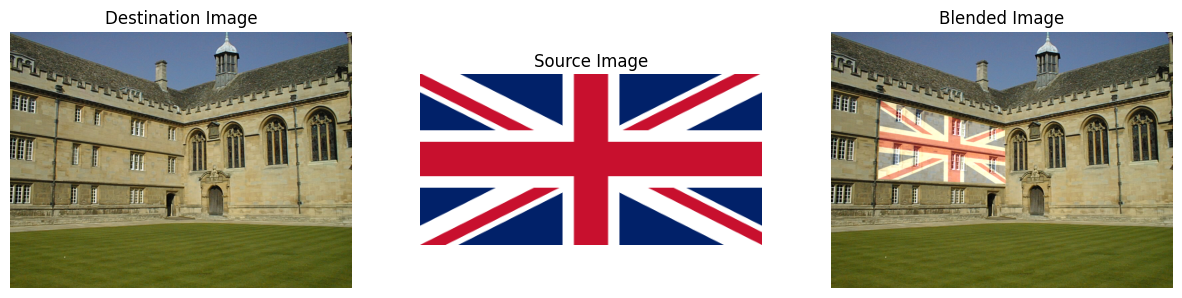

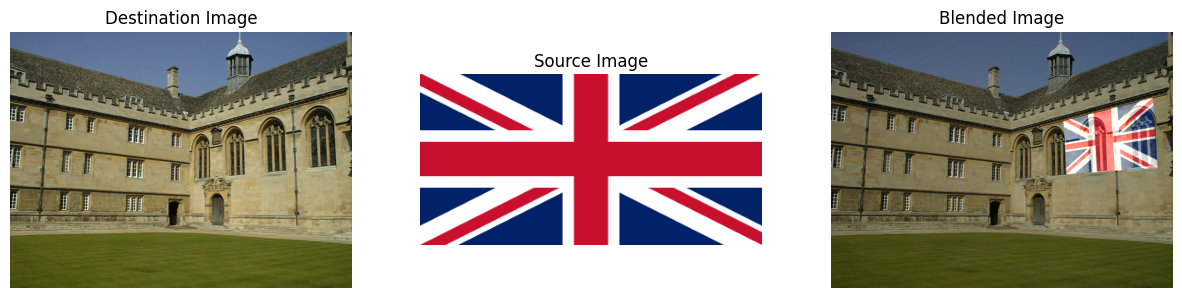

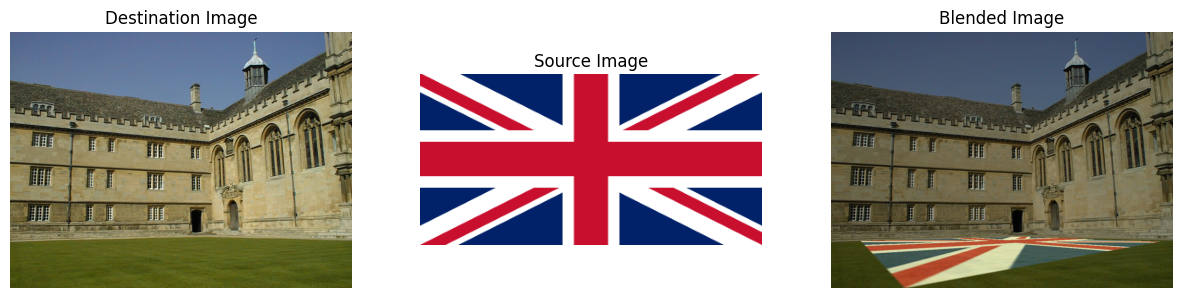

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

images = [cv.imread('001.jpg'),cv.imread('002.jpg'), cv.imread('003.jpg')]
coffs = [(1, 0.4, 0.2), (0.8, 0.7, 0), (0.7, 0.6, 0)]
for i in range(len(images)):
    flag = cv.imread('383px-Flag_of_the_United_Kingdom.svg.png')
    points = []
    clicks = 0
    def click(event, x, y, flags, params):
        if event == cv.EVENT_LBUTTONDOWN:
            points.append([x,y])
    img = images[i]
    cv.imshow('image', img)
    cv.setMouseCallback('image', click)
    cv.waitKey(0)
    cv.destroyAllWindows()

    if flag is None:
        print(f"Error: Could not load source image '{source_images[i]}'")
        continue
    
    w, h = flag.shape[1], flag.shape[0]
    pts_src = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]])
    pts_dst = np.array(points)
    h, status = cv.findHomography(pts_src, pts_dst)
    im_out = cv.warpPerspective(flag, h, (img.shape[1], img.shape[0]))
    blended_img = cv.addWeighted(img, coffs[i][0], im_out, coffs[i][1], coffs[i][2])
    #blended_img = cv.addWeighted(img, 1, im_out, 0.4, 0.2)
    im=[img, flag, blended_img]
    cv.imshow("Blended Image", blended_img)
    cv.waitKey(0)
    cv.destroyAllWindows()

    fig, ax = plt.subplots(1, 3, figsize=(15, 10), facecolor="white")
    titles = ['Destination Image', 'Source Image', 'Blended Image']
    for j in range(3):
        transformed_img_ = cv.cvtColor(im[j], cv.COLOR_BGR2RGB)
        ax[j].axis('off')
        ax[j].imshow(transformed_img_)
        ax[j].set_title(titles[j])
    

plt.show()